In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import sklearn
import os

ModuleNotFoundError: No module named 'tensorflow'

# 1、基本模型构建

## 1.1 准备数据集
在这里我们使用了fashion_mnist数据集，里面是70000张28*28的图片，图片分为衣服、鞋子等10类。

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all,y_train_all),(x_test,y_test) = fashion_mnist.load_data()
x_valid,x_train = x_train_all[:5000],x_train_all[5000:]
y_valid,y_train = y_train_all[:5000],y_train_all[5000:]

print(x_train.shape,y_train.shape)
print(x_valid.shape,y_valid.shape)
print(x_test.shape,y_test.shape)

(55000, 28, 28) (55000,)
(5000, 28, 28) (5000,)
(10000, 28, 28) (10000,)


我们看一下图片是什么样子的：

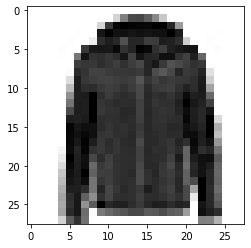

In [3]:
def show_single_image(img_arr):
    plt.imshow(img_arr, cmap='binary')
    plt.show()
    
show_single_image(x_train[0])

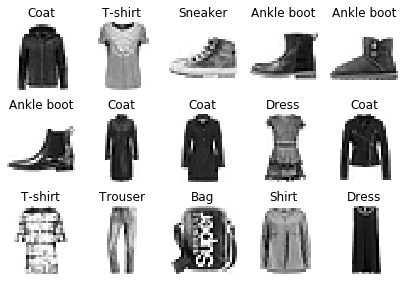

In [4]:
def show_imgs(n_rows, n_cols, x_data, y_data, class_names):
    assert len(x_data) == len(y_data)
    assert n_rows * n_cols < len(x_data)
    plt.figure(figsize = (n_cols * 1.4, n_rows * 1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col 
            plt.subplot(n_rows, n_cols, index+1)
            plt.imshow(x_data[index], cmap="binary",
                       interpolation = 'nearest')
            plt.axis('off')
            plt.title(class_names[y_data[index]])
    plt.show()

class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker',
               'Bag', 'Ankle boot']
show_imgs(3, 5, x_train, y_train, class_names)

## 1.2 构建模型
构建模型主要分成2部分：

（1）指定模型的各层节点数及其连接

（2）编译模型，指定损失函数、优化方法、metrics等

In [5]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28])) #将输入的二维数组展开成一维向量
model.add(keras.layers.Dense(300,activation='sigmoid'))
model.add(keras.layers.Dense(100,activation='sigmoid'))
model.add(keras.layers.Dense(10,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

如果sigmoid改成relu的话，精度就会降低非常的多。为啥呢？

这样我们的模型就构建完成了，我们看一下模型长什么样子的：

In [6]:
model.layers

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


## 1.3 训练模型
训练模型fit()返回的是一个History对象，用于保存中间计算过程的数据。

In [8]:
history = model.fit(x_train,y_train,epochs=10,validation_data=(x_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 5s 84us/sample - loss: 1.1532 - accuracy: 0.6835 - val_loss: 0.7628 - val_accuracy: 0.7630
Epoch 2/10
55000/55000 [==============================] - 4s 75us/sample - loss: 0.6834 - accuracy: 0.7775 - val_loss: 0.6257 - val_accuracy: 0.7938
Epoch 3/10
55000/55000 [==============================] - 4s 73us/sample - loss: 0.5962 - accuracy: 0.7975 - val_loss: 0.5759 - val_accuracy: 0.8026
Epoch 4/10
55000/55000 [==============================] - 4s 68us/sample - loss: 0.5637 - accuracy: 0.8077 - val_loss: 0.5485 - val_accuracy: 0.8180
Epoch 5/10
55000/55000 [==============================] - 4s 69us/sample - loss: 0.5492 - accuracy: 0.8119 - val_loss: 0.5523 - val_accuracy: 0.8196
Epoch 6/10
55000/55000 [==============================] - 4s 72us/sample - loss: 0.5399 - accuracy: 0.8138 - val_loss: 0.5395 - val_accuracy: 0.8162
Epoch 7/10
55000/55000 [==============================] -

In [9]:
type(history)
history.history

{'loss': [1.1531692505056208,
  0.6834324073704806,
  0.5962123948704112,
  0.5636903895074671,
  0.5492214193257419,
  0.5399470478057862,
  0.5403768696958369,
  0.5438170063669031,
  0.5421874423027039,
  0.5510842502680692],
 'accuracy': [0.68347275,
  0.7775273,
  0.7975091,
  0.80774546,
  0.81185454,
  0.81383634,
  0.81463635,
  0.81274545,
  0.8131273,
  0.8103455],
 'val_loss': [0.7627840176582337,
  0.6256708798408508,
  0.5759064820289612,
  0.5484777911186218,
  0.5523245029449463,
  0.5395483220100403,
  0.5455497787475586,
  0.5438048985958099,
  0.5547250242233276,
  0.5551098223686218],
 'val_accuracy': [0.763,
  0.7938,
  0.8026,
  0.818,
  0.8196,
  0.8162,
  0.8206,
  0.8164,
  0.8106,
  0.8236]}

我们把训练过程中的loss及accuracy打印出来:

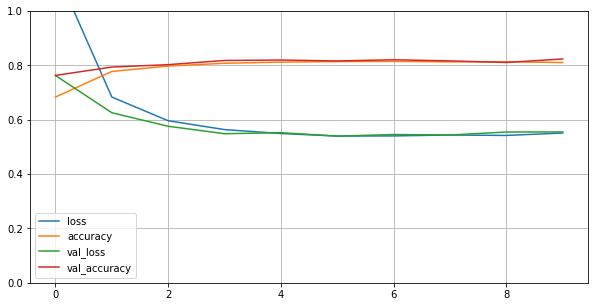

In [10]:
def print_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(10,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
    
print_learning_curves(history)

## 1.4 evaluate模型

In [11]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 51us/sample - loss: 0.5953 - accuracy: 0.7965


[0.5953118251800538, 0.7965]

# 1.5 完整代码

In [ ]:
import numpy as tf
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(x_train_all,y_train_all),(x_test,y_test) = fashion_mnist.load_data()
x_valid,x_train = x_train_all[:5000],x_train_all[5000:]
y_valid,y_train = y_train_all[:5000],y_train_all[5000:]

print(x_train.shape,y_train.shape)
print(x_valid.shape,y_valid.shape)
print(x_test.shape,y_test.shape)

def show_single_image(img_arr):
    plt.imshow(img_arr, cmap='binary')
    plt.show()
    
show_single_image(x_train[0])

def show_imgs(n_rows, n_cols, x_data, y_data, class_names):
    assert len(x_data) == len(y_data)
    assert n_rows * n_cols < len(x_data)
    plt.figure(figsize = (n_cols * 1.4, n_rows * 1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col 
            plt.subplot(n_rows, n_cols, index+1)
            plt.imshow(x_data[index], cmap="binary",
                       interpolation = 'nearest')
            plt.axis('off')
            plt.title(class_names[y_data[index]])
    plt.show()

class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker',
               'Bag', 'Ankle boot']
show_imgs(3, 5, x_train, y_train, class_names)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28])) #将输入的二维数组展开成一维向量
model.add(keras.layers.Dense(300,activation='sigmoid'))
model.add(keras.layers.Dense(100,activation='sigmoid'))
model.add(keras.layers.Dense(10,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

model.layers
model.summary()

history = model.fit(x_train,y_train,epochs=10,validation_data=(x_valid,y_valid))

type(history)
history.history

def print_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(10,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
    
print_learning_curves(history)

model.evaluate(x_test,y_test)

# 2、归一化

In [14]:
print(np.max(x_train), np.min(x_train))

255 0


现有数据在0~255之间，下面我们对数据做归一化。

我们使用均值是0，方差为1的标准正则归一化（也叫Z-score归一化），即： x = (x-u)/std

还有一种常见的归一化方式：Min-max归一化：x*=(x-min)/(max-min),取值在[0,1]之间。

In [27]:
#scaler = sklearn.preprocessing.StandardScaler()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaler = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_valid_scaler = scaler.transform(
    x_valid.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_test_scaler = scaler.transform(
    x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)

上述代码的几个说明：

（1）fit_transform/transform接受的是一个二维浮点数向量作为参数，所以需要先转成2维向量再转回三维。

（2）fit_transform()和transform()：fit_transform()除了transform的归一化功能外，还把数据集的均值和方差记录下来，供下面的验证集、测试集使用。

然后我们再训练时使用上面经过归一化的数据：

In [25]:
history = model.fit(x_train_scaler,y_train,epochs=10,validation_data=(x_valid_scaler,y_valid))
model.evaluate(x_test_scaler,y_test)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 6s 108us/sample - loss: 0.3713 - accuracy: 0.8687 - val_loss: 0.3745 - val_accuracy: 0.8684
Epoch 2/10
55000/55000 [==============================] - 5s 86us/sample - loss: 0.3662 - accuracy: 0.8709 - val_loss: 0.3724 - val_accuracy: 0.8716
Epoch 3/10
55000/55000 [==============================] - 4s 77us/sample - loss: 0.3616 - accuracy: 0.8720 - val_loss: 0.3671 - val_accuracy: 0.8716
Epoch 4/10
55000/55000 [==============================] - 4s 75us/sample - loss: 0.3567 - accuracy: 0.8736 - val_loss: 0.3678 - val_accuracy: 0.8720
Epoch 5/10
55000/55000 [==============================] - 5s 93us/sample - loss: 0.3526 - accuracy: 0.8743 - val_loss: 0.3590 - val_accuracy: 0.8728
Epoch 6/10
55000/55000 [==============================] - 5s 84us/sample - loss: 0.3484 - accuracy: 0.8769 - val_loss: 0.3572 - val_accuracy: 0.8716
Epoch 7/10
55000/55000 [==============================] 

[0.3831564260005951, 0.8617]

## 3、回调函数：TensorBoard EarlyStopping ModelCheckpoint

Callbacks: utilities called at certain points during model training.

也就是说模型训练过程中在某些点会触发一些功能或者操作。

最常用的就是TensorBoard EarlyStopping ModelCheckpoint这3类，以下会分别介绍。完整的callback请参考官方文档的
tf.keras.callback：https://www.tensorflow.org/api_docs/python/tf/keras/callbacks?hl=zh-cn
    

In [35]:
logdir = './callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir,"fashion_mnist_model.h5")

callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file, save_best_only = True),
    keras.callbacks.EarlyStopping(patience=5,min_delta=1e-3)
]

history = model.fit(x_train_scaler, y_train, epochs=10, 
                   validation_data=(x_valid_scaler,y_valid),
                   callbacks = callbacks)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 5s 99us/sample - loss: 0.3303 - accuracy: 0.8825 - val_loss: 0.3444 - val_accuracy: 0.8752
Epoch 2/10
55000/55000 [==============================] - 4s 82us/sample - loss: 0.3271 - accuracy: 0.8845 - val_loss: 0.3417 - val_accuracy: 0.8776
Epoch 3/10
55000/55000 [==============================] - 5s 89us/sample - loss: 0.3240 - accuracy: 0.8847 - val_loss: 0.3406 - val_accuracy: 0.8768
Epoch 4/10
55000/55000 [==============================] - 5s 98us/sample - loss: 0.3206 - accuracy: 0.8870 - val_loss: 0.3399 - val_accuracy: 0.8780
Epoch 5/10
55000/55000 [==============================] - 4s 81us/sample - loss: 0.3176 - accuracy: 0.8874 - val_loss: 0.3360 - val_accuracy: 0.8780
Epoch 6/10
55000/55000 [==============================] - 4s 79us/sample - loss: 0.3147 - accuracy: 0.8881 - val_loss: 0.3360 - val_accuracy: 0.8804


启动tensorborad的方式很简单：

tensorboard --logdir=callbacks

然后打开http://localhost:6006/ 即可。

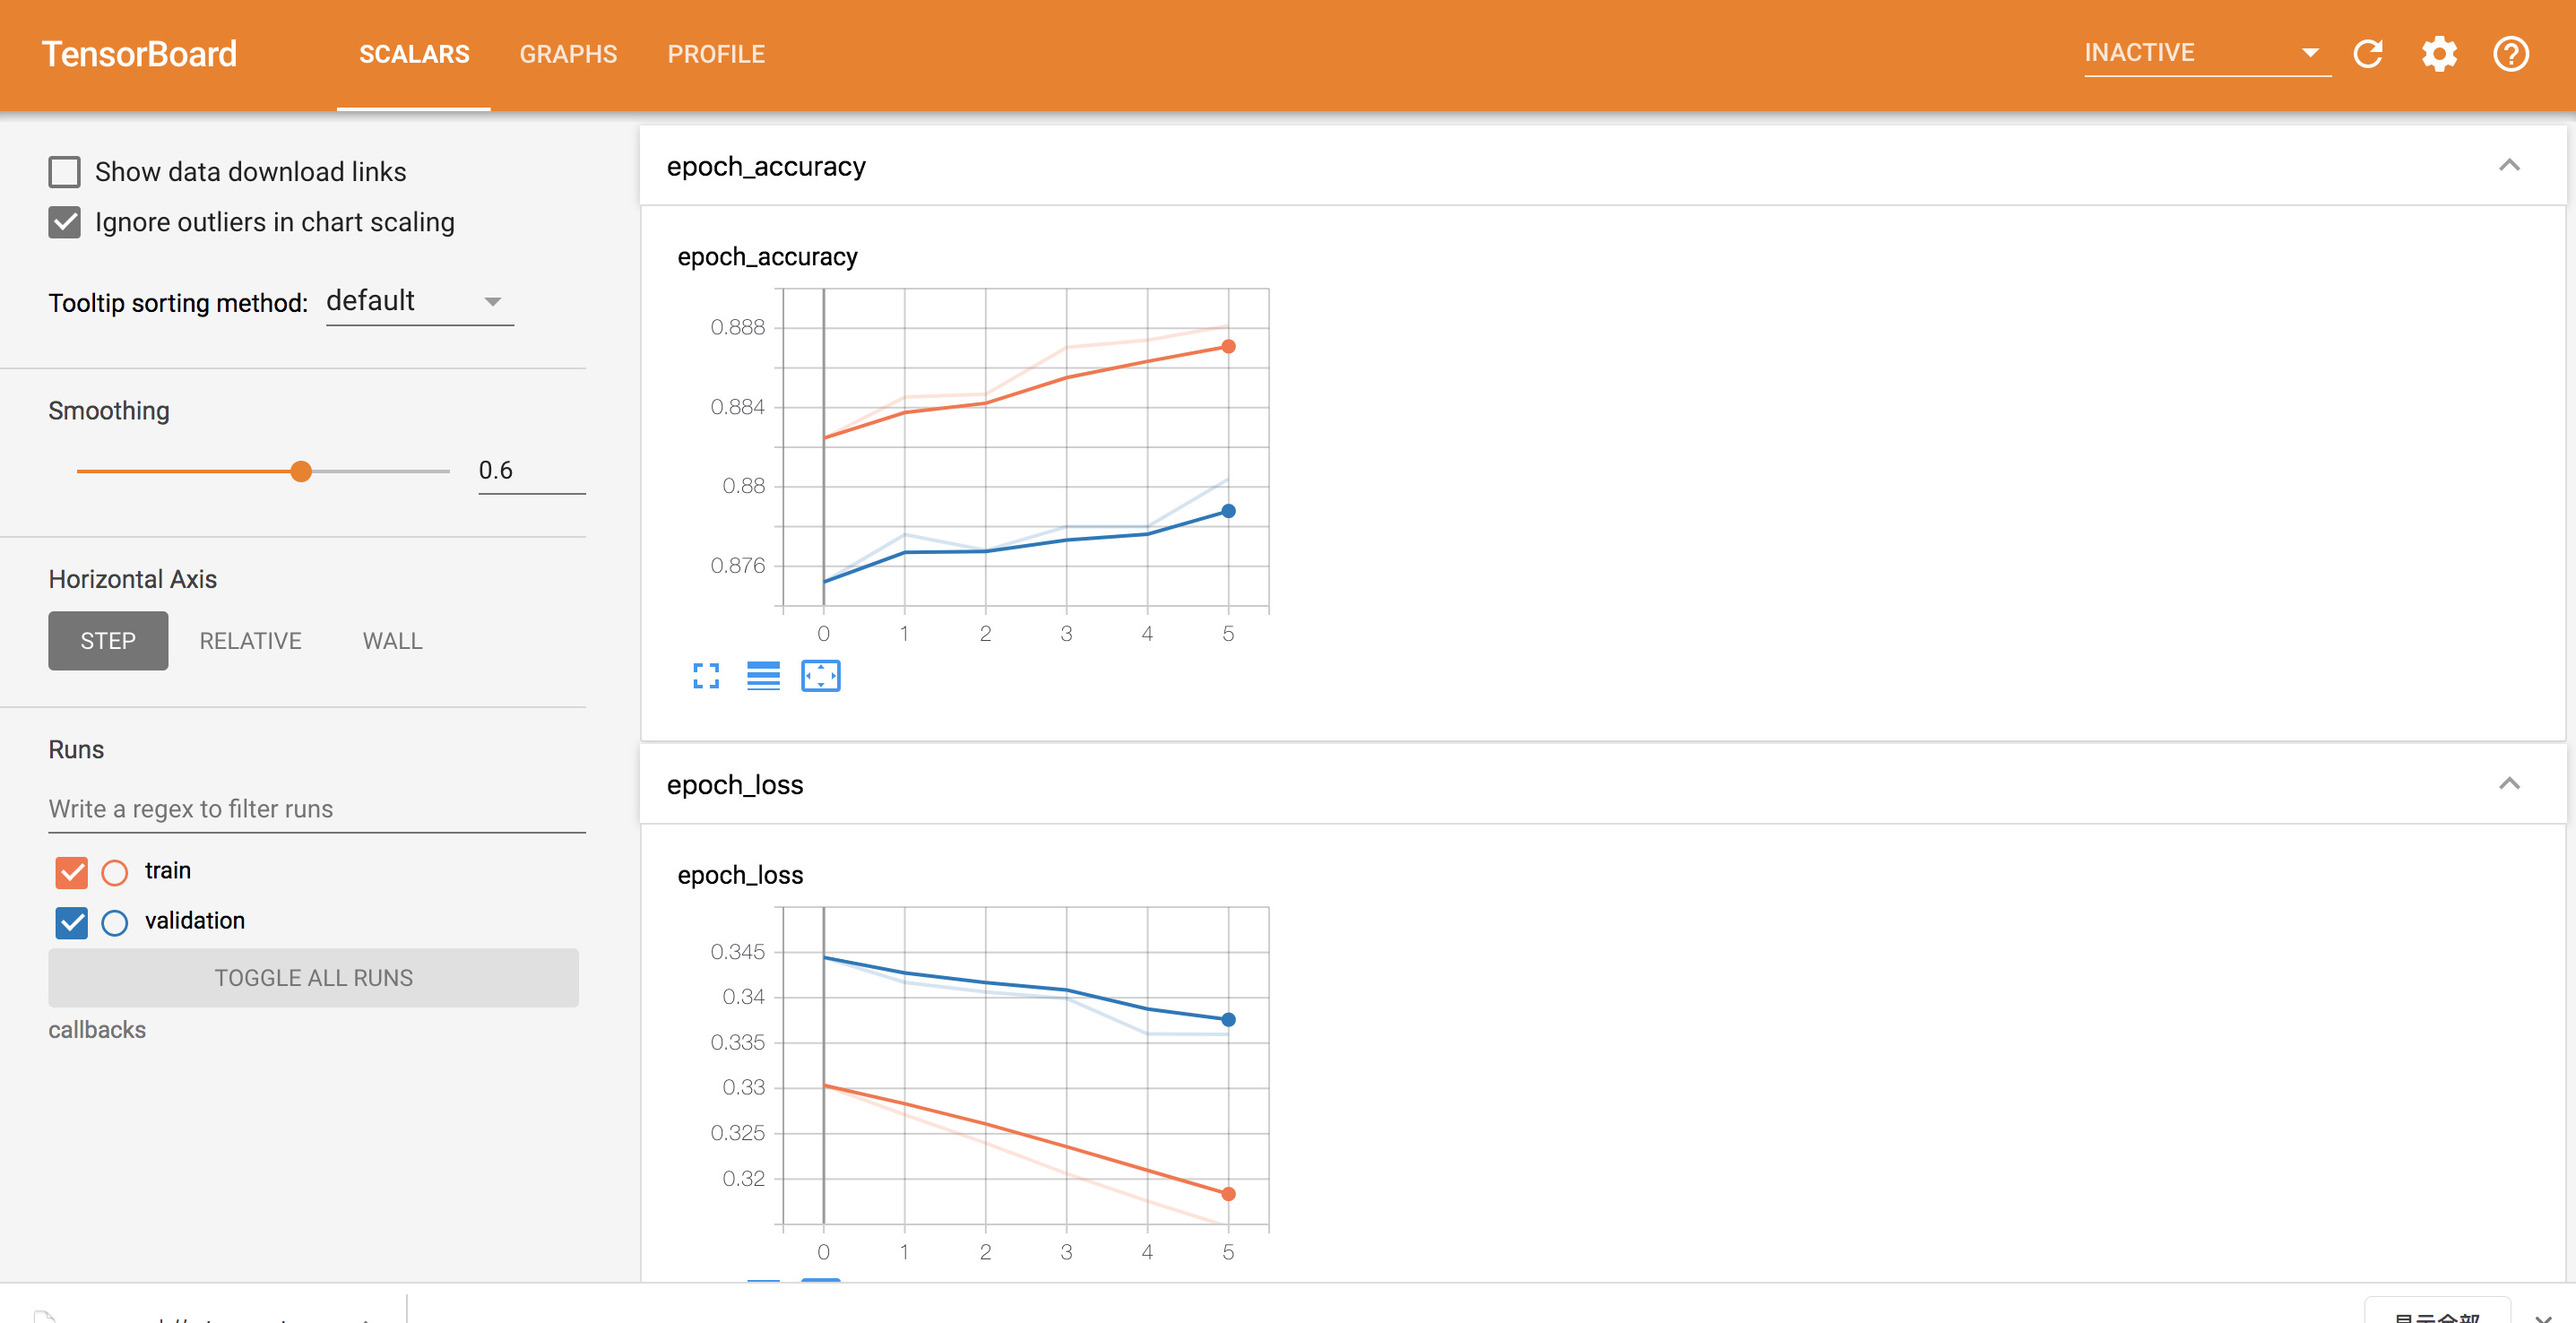

## 4、深度神经网络

DNN也没什么特别，就是层数比较多：

In [42]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
for _ in range(20):
    model.add(keras.layers.Dense(10,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

DNN在前几个ecpochs的训练时，loss降低的很慢，导致这个问题的原因主要有：

（1）参数众多、训练不足

（2）梯度消失 多层符合函数的链式法则导致的。

## 5、批归一化、dropout、激活函数

### 5.1 批归一化

归一化是对训练、测试数据做了归一化，就是模型的输入数据做了归一化。

而批归一化是对每一层激活函数的输出（也就是下一层的输入）都做了归一化。

In [43]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
for _ in range(20):
    model.add(keras.layers.Dense(10,activation='relu'))
    model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10,activation='softmax'))

### 5.2 selu
上述relu+批归一化也可以通过直接使用selu激活函数代替：


In [44]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
for _ in range(20):
    model.add(keras.layers.Dense(10,activation='selu'))
model.add(keras.layers.Dense(10,activation='softmax'))

### 5.3 dropout

In [46]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
for _ in range(20):
    model.add(keras.layers.Dense(10,activation='selu'))
model.add(keras.layers.AlphaDropout(rate=0.5))# 只在最后一层添加了dropout
# AlphaDropout: 1. 均值和方差不变 2. 归一化性质也不变
# model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(10,activation='softmax'))

## 6、完整代码

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 8s 142us/sample - loss: 0.6819 - accuracy: 0.7704 - val_loss: 0.6504 - val_accuracy: 0.8530
Epoch 2/10
55000/55000 [==============================] - 6s 112us/sample - loss: 0.4578 - accuracy: 0.8436 - val_loss: 0.5670 - val_accuracy: 0.8630
Epoch 3/10
55000/55000 [==============================] - 8s 149us/sample - loss: 0.4055 - accuracy: 0.8603 - val_loss: 0.5578 - val_accuracy: 0.8652
Epoch 4/10
55000/55000 [==============================] - 6s 116us/sample - loss: 0.3723 - accuracy: 0.8717 - val_loss: 0.5189 - val_accuracy: 0.8762
Epoch 5/10
55000/55000 [==============================] - 6s 105us/sample - loss: 0.3522 - accuracy: 0.8755 - val_loss: 0.5096 - val_accuracy: 0.8684
Epoch 6/10
55000/55000 [==============================] - 8s 146us/sample - loss: 0.3329 - accuracy: 0.8814 - val_loss: 0.5457 - val_accuracy: 0.8746
Epoch 7/10
55000/55000 [===========================

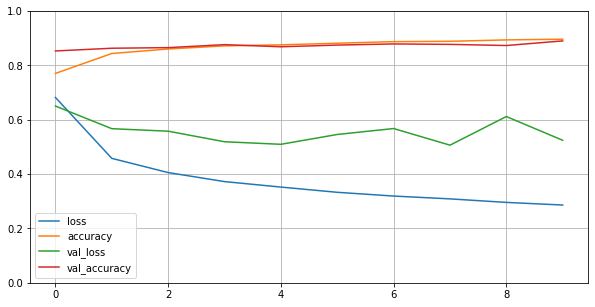

10000/10000 [==============================] - 1s 51us/sample - loss: 0.5968 - accuracy: 0.8747


[0.5967673835813999, 0.8747]

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import sklearn
import os

#导入数据
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all,y_train_all),(x_test,y_test) = fashion_mnist.load_data()
x_valid,x_train = x_train_all[:5000],x_train_all[5000:]
y_valid,y_train = y_train_all[:5000],y_train_all[5000:]

#训练数据归一化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_valid_scaler = scaler.transform(
    x_valid.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_test_scaler = scaler.transform(
    x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)

#构建及compile模型
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
for _ in range(20):
    model.add(keras.layers.Dense(100,activation='selu'))
model.add(keras.layers.AlphaDropout(rate=0.5))
model.add(keras.layers.Dense(10,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

#定义callback
logdir = './callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir,"fashion_mnist_model.h5")

callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file, save_best_only = True),
    keras.callbacks.EarlyStopping(patience=5,min_delta=1e-3)
]

#训练模型
history = model.fit(x_train_scaler, y_train, epochs=10, 
                   validation_data=(x_valid_scaler,y_valid),
                   callbacks = callbacks)

#检查模型效果
def print_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(10,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
    
print_learning_curves(history)

model.evaluate(x_test_scaler,y_test)